# **Neural Netwrok**

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import neural_network

Fisrt we provides an example of computing the gradients of a full neural
network with cross-entropy loss. The forward pass of the model is as follows:
$$
\begin{aligned}
\boldsymbol{x} &=\text { input } \\
\boldsymbol{z} &=\boldsymbol{W} \boldsymbol{x}+\boldsymbol{b}_{1} \\
\boldsymbol{h} &=\operatorname{ReLU}(\boldsymbol{z}) \\
\boldsymbol{\theta} &=\boldsymbol{U} \boldsymbol{h}+\boldsymbol{b}_{2} \\
\hat{\boldsymbol{y}} &=\operatorname{softmax}(\boldsymbol{\theta}) \\
J &=C E(\boldsymbol{y}, \hat{\boldsymbol{y}})
\end{aligned}
$$
The dimensions of the model’s parameters
are
$$
\boldsymbol{x} \in \mathbb{R}^{D_{x} \times 1} \quad \boldsymbol{b}_{1} \in \mathbb{R}^{D_{h} \times 1} \quad \boldsymbol{W} \in \mathbb{R}^{D_{h} \times D_{x}} \quad \boldsymbol{b}_{2} \in \mathbb{R}^{N_{c} \times 1} \quad \boldsymbol{U} \in \mathbb{R}^{N_{c} \times D_{h}}
$$
where $D_x$ is the size of our input, $D_h$ is the size of our hidden layer, and $N_c$ is the number of classes. So let's start to compute all of the network’s gradients:
$$
\begin{array}{lllll}
\frac{\partial J}{\partial \boldsymbol{U}} & \frac{\partial J}{\partial \boldsymbol{b}_{2}} & \frac{\partial J}{\partial \boldsymbol{W}} & \frac{\partial J}{\partial \boldsymbol{b}_{1}} & \frac{\partial J}{\partial \boldsymbol{x}}
\end{array}
$$
As we know $ReLU(x) = max(x,0)$ This means:
$$
\operatorname{ReLU}^{\prime}(x)=\left\{\begin{array}{ll}
1 & \text { if } x>0 \\
0 & \text { if otherwise }
\end{array} \quad=\operatorname{sgn}(\operatorname{ReLU}(x))\right.
$$
Also we know that the cross-entropy loss with respect to logits ($(\hat{\boldsymbol{y}}=\operatorname{softmax}(\boldsymbol{\theta}), J=CE(\hat{\boldsymbol{y}}, \boldsymbol{y})$) can be compute as follow:
$$
\frac{\partial J}{\partial \boldsymbol{\theta}}=\hat{\boldsymbol{y}}-\boldsymbol{y}
$$

So based on chain rule we can compute the network gradient as follow:
$$\frac{\partial J}{\partial \boldsymbol{U}} = \frac{\partial J}{\partial \boldsymbol{\theta}} \frac{\partial \theta}{\partial \boldsymbol{U}} = (\hat{y} - y) . h^{\top}$$

$$\frac{\partial J}{\partial b2} = \frac{\partial J}{\partial \boldsymbol{\theta}} \frac{\partial \theta}{\partial b2} = (\hat{y} - y)$$

$$\frac{\partial J}{\partial h} = \frac{\partial J}{\partial \boldsymbol{\theta}} \frac{\partial \theta}{\partial h} = U^{\top} . (\hat{y} - y)$$

$$\frac{\partial J}{\partial z} = \frac{\partial J}{\partial h} \frac{\partial h}{\partial z} = U^{\top} . (\hat{y} - y) . sgn(h)$$

$$\frac{\partial J}{\partial W} = \frac{\partial J}{\partial z} \frac{\partial z}{\partial W} =\frac{\partial J}{\partial z} . x^{\top}$$

$$\frac{\partial J}{\partial b1} = \frac{\partial J}{\partial z} \frac{\partial z}{\partial b1} =\frac{\partial J}{\partial z}$$

$$\frac{\partial J}{\partial x} = \frac{\partial J}{\partial z} \frac{\partial z}{\partial x} = W^{\top} . \frac{\partial J}{\partial z}$$

# Evaluate

In [ ]:
MyNetwork = neural_network.NN()
MyNetwork.hidden_dims=(512, 256)
MyNetwork.lr=.03
MyNetwork.batch_size=100
MyNetwork.seed=0
log = MyNetwork.train_loop(30)

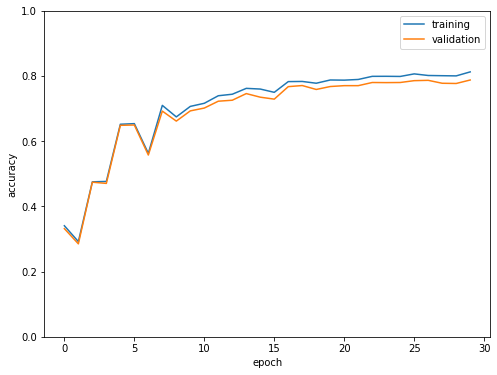

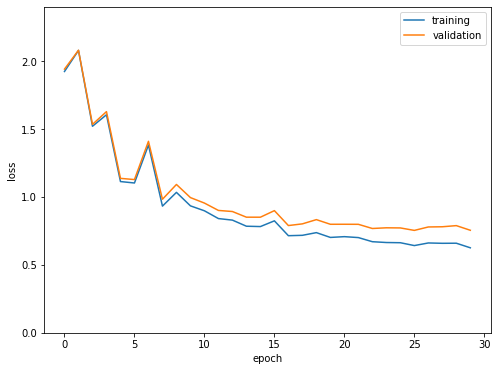

In [ ]:
MyNetwork.plot_accuracy(30,log)
MyNetwork.plot_loss(30,log)

Train for 30 epoch with normalization

In [ ]:
MyNetwork = neural_network.NN(normalization=True)
MyNetwork.hidden_dims=(512, 256)
MyNetwork.lr=.03
MyNetwork.batch_size=100
MyNetwork.seed=0
MyNetwork.normalization = True
log = MyNetwork.train_loop(30)

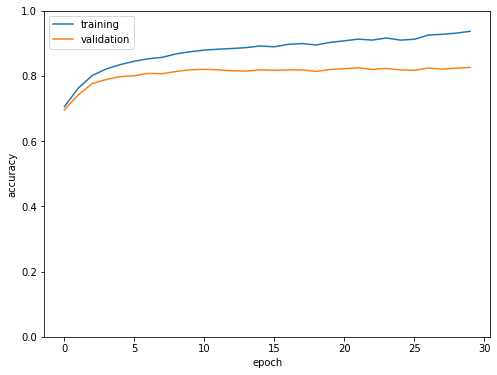

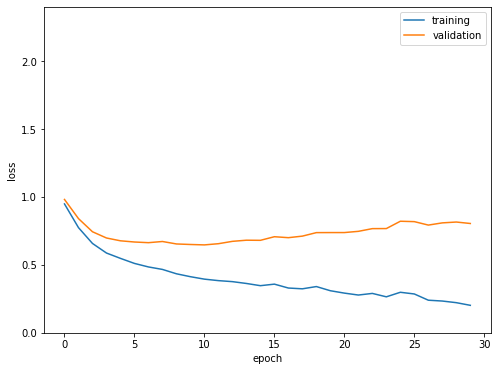

In [ ]:
MyNetwork.plot_accuracy(30,log)
MyNetwork.plot_loss(30,log)

Let's go deeper

In [ ]:
MyNetwork = neural_network.NN(hidden_dims=(512, 120, 120, 120, 120, 120, 120))
MyNetwork.lr=.03
MyNetwork.batch_size=100
MyNetwork.seed=0
log = MyNetwork.train_loop(30)

Epoch: 0  train_accuracy= 0.2588358208955224  validation_accuracy= 0.262
Epoch: 1  train_accuracy= 0.3475671641791045  validation_accuracy= 0.3473333333333333
Epoch: 2  train_accuracy= 0.5051044776119403  validation_accuracy= 0.5096666666666667
Epoch: 3  train_accuracy= 0.5286268656716417  validation_accuracy= 0.5313333333333333
Epoch: 4  train_accuracy= 0.5845820895522388  validation_accuracy= 0.5866666666666667
Epoch: 5  train_accuracy= 0.6472686567164179  validation_accuracy= 0.6543333333333333
Epoch: 6  train_accuracy= 0.6706567164179105  validation_accuracy= 0.656
Epoch: 7  train_accuracy= 0.6097014925373134  validation_accuracy= 0.5973333333333334
Epoch: 8  train_accuracy= 0.6787611940298508  validation_accuracy= 0.6646666666666666
Epoch: 9  train_accuracy= 0.731955223880597  validation_accuracy= 0.716
Epoch: 10  train_accuracy= 0.7280597014925373  validation_accuracy= 0.7196666666666667
Epoch: 11  train_accuracy= 0.7214626865671642  validation_accuracy= 0.71
Epoch: 12  train_acc

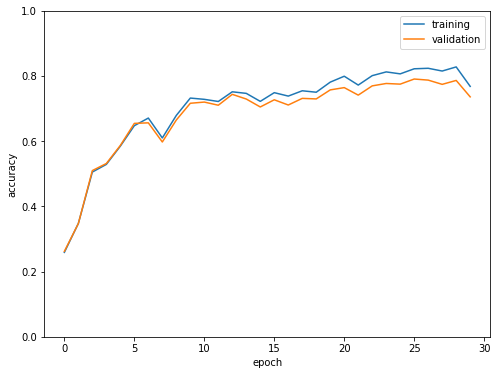

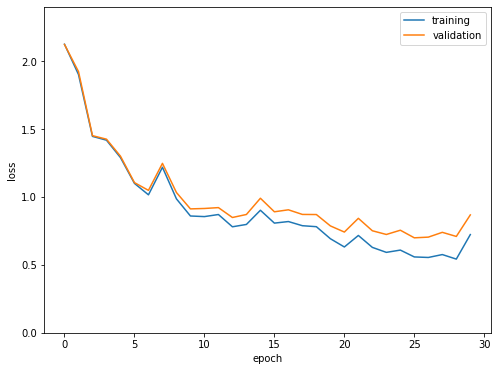

In [ ]:
MyNetwork.plot_accuracy(30,log)
MyNetwork.plot_loss(30,log)

# Noise Injection

In [ ]:
datapath = '/content/drive/MyDrive/Colab Notebooks/svhn.pkl'
MyNetwork = NN(normalization=True)
MyNetwork.load_model("model.pkl")

In [ ]:
print("Shuffel labels")
print("Shuffel for 20% of labesl")
MyNetwork.shuffel_evaluate(0.2)
print("Shuffel for 50% of labesl")
MyNetwork.shuffel_evaluate(0.5)
print("Shuffel for 90% of labesl")
MyNetwork.shuffel_evaluate(0.9)

Shuffel labels
Shuffel for 20% of labesl
train_accuracy= 0.7742537313432836  test_accuracy= 0.6662
Shuffel for 50% of labesl
train_accuracy= 0.530910447761194  test_accuracy= 0.463
Shuffel for 90% of labesl
train_accuracy= 0.20259701492537313  test_accuracy= 0.1854


In [ ]:
print("Test noise capabelity")
print("1% noise")
MyNetwork.noisy_evaluate(0.01)
print("5% noise")
MyNetwork.noisy_evaluate(0.05)
print("10% noise")
MyNetwork.noisy_evaluate(0.1)
print("50% noise")
MyNetwork.noisy_evaluate(0.5)

Test noise capabelity
1% noise
train_accuracy= 0.9366865671641791  test_accuracy= 0.8042
5% noise
train_accuracy= 0.9365820895522388  test_accuracy= 0.80435
10% noise
train_accuracy= 0.9343880597014925  test_accuracy= 0.8033
50% noise
train_accuracy= 0.8785820895522388  test_accuracy= 0.7753
